# Modelo Python

## Librerías

Se instalan librerías

In [1]:
import numpy as np
import pandas as pd
from dfply import * #dplyr para python
from plotnine import * # ggplot2 para python
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Leer información

In [2]:
data=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
(
 data >>
    head()
)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

Se quitan duplicados

In [4]:
data=(
 data >>
    distinct()
)

(
 data >> head()
)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

Información del DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


Se pone en 1 y 0 la variable **y**

In [6]:
data=(
 data >>
    mutate(y = X.y.replace('yes', '1').replace('no', '0'))
)

## Descriptivos

Distribución de la edad

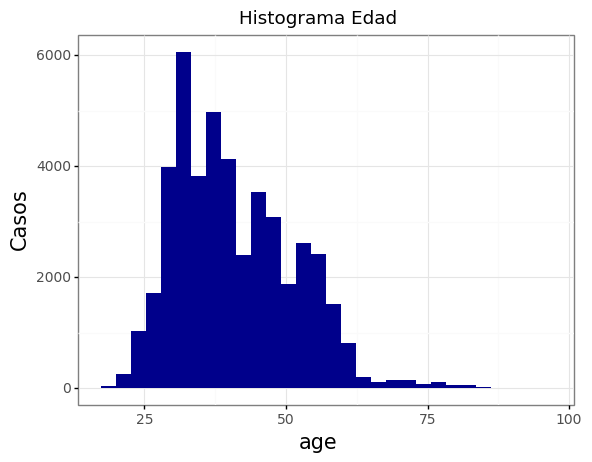

<ggplot: (7554467981)>

In [7]:
(
 data >>
    ggplot() +
    geom_histogram(aes(x = 'age'), fill = 'darkblue', bins = 30) +
    theme_bw() +
    ggtitle('Histograma Edad') +
    ylab('Casos') +
    theme(axis_title_y=element_text(size=15),
          axis_title_x=element_text(size=15),
          axis_text_y=element_text(size=10),
          axis_text_x=element_text(size=10))
)

Distribución de edad por trabajo

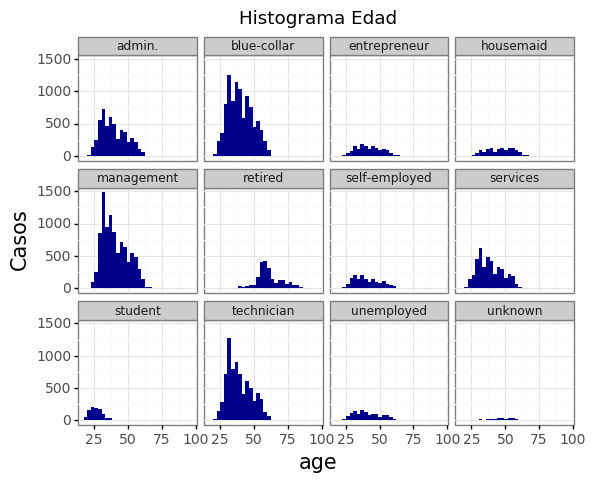

<ggplot: (297701163)>

In [8]:
(
 data >>
    ggplot() +
    geom_histogram(aes(x = 'age'), fill = 'darkblue', bins = 30) +
    theme_bw() +
    ggtitle('Histograma Edad') +
    ylab('Casos') +
    theme(axis_title_y=element_text(size=15),
          axis_title_x=element_text(size=15),
          axis_text_y=element_text(size=10),
          axis_text_x=element_text(size=10)) +
    facet_wrap('~job')
)

Distribución de trabajos

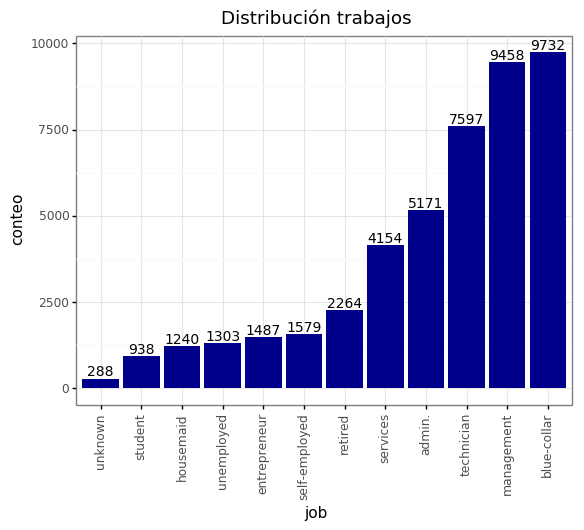

<ggplot: (-9223372029299558947)>

In [9]:
jobs=(
 data >>
    group_by(X.job) >>
    summarize(n = n(X.job)) >>
    rename(conteo='n') >>
    arrange(X.conteo) >>
    select(X.job) >>
    pull
)

(
 data >>
    group_by(X.job) >>
    summarize(n = n(X.job)) >>
    rename(conteo='n') >>
    arrange(X.conteo) >>
    mutate(job = X.job.astype('category', order='F')) >>
    ggplot() +
    geom_bar(aes(x='job', y = 'conteo'), stat = 'identity', fill = 'darkblue') +
    ggtitle('Distribución trabajos') +
    theme_bw() +
    geom_text(aes(x='job', y='conteo', label='conteo'), size = 10, va = 'bottom') +
    theme(axis_text_x = element_text(angle = 90)) +
    scale_x_discrete(limits = jobs)
)

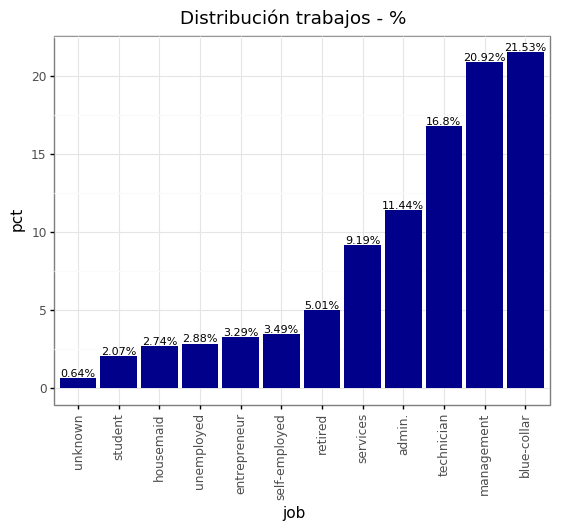

<ggplot: (-9223372029299412508)>

In [10]:
(
 data >>
    group_by(X.job) >>
    summarize(n = n(X.job)/len(data)*100) >>
    rename(pct='n') >>
    mutate(pct = X.pct.round(2)) >>
    arrange(X.pct) >>
    mutate(job = X.job.astype('category', order='F')) >>
    ggplot() +
    geom_bar(aes(x='job', y = 'pct'), stat = 'identity', fill = 'darkblue') +
    ggtitle('Distribución trabajos - %') +
    theme_bw() +
    theme(axis_text_x = element_text(angle = 90)) +
    scale_x_discrete(limits = jobs) +
    geom_text(aes(x='job', y='pct', label='pct'), size = 8, va = 'bottom', format_string='{}%')
)

Distribución de trabajos por estado civil, quitando los trabajos desconocidos

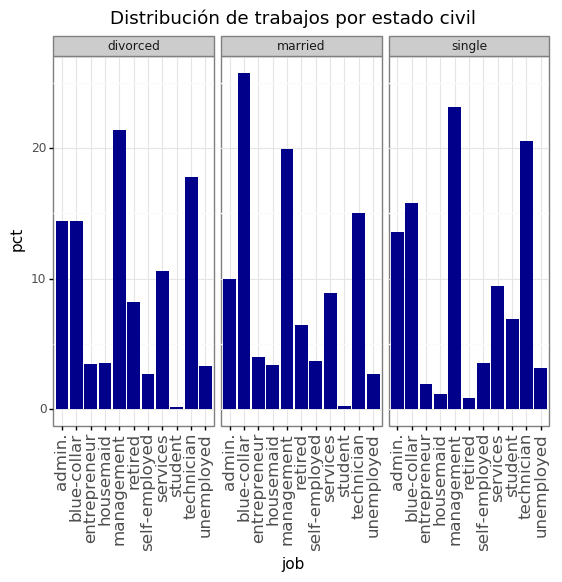

<ggplot: (-9223372029299417526)>

In [11]:
(
 data >>
    mask(X.job != 'unknown') >>
    group_by(X.job, X.marital) >>
    summarize(n = n(X.job)) >>
    group_by(X.marital) >>
    mutate(total = X.n.sum()) >>
    mutate(pct = X.n/X.total*100) >>
    mutate(pct = X.pct.round(2)) >>
    ggplot() +
    geom_bar(aes(x = 'job', y = 'pct'), stat = 'identity', fill = 'darkblue') +
    ggtitle('Distribución de trabajos por estado civil') +
    facet_wrap('~marital') +
    theme_bw() +
    theme(axis_text_x=element_text(angle = 90, size = 12, va = 'top'))
)

Regresión Lineal de edad

In [12]:
# Creamos data frame sólo con edad y la variable y, haciendo la y numérica
data_age=(
 data >>
    mutate(y = X.y.astype('int')) >>
    select(X.age, X.y)
)

# Dejamos la edad (que es la variable X) en un data frame
data_age_x=(
 data_age >>
    mutate(age2 = X.age*X.age) >>
    select(X.age, X.age2)
)

# Dejamos la variable y en un data frame separado
data_age_y=(
 data_age >>
    select(X.y)
)

# Creamos el objeto para hacer la regresión
regr = linear_model.LinearRegression()

Creamos el objeto para hacer la regresión

In [13]:
regr = linear_model.LinearRegression()

Hacemos la regresión _fit_

In [14]:
regr.fit(data_age_x, data_age_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Se hace un predict a las mismas equis con las que se entrenó el modelo

In [15]:
age_y_pred = regr.predict(data_age_x)

Se imprime el coeficente y el intercepto

In [16]:
print('Coeficiente:', regr.coef_, '\nIntercepto', regr.intercept_)

Coeficiente: [[-0.02787471  0.00032123]] 
Intercepto [0.68353344]


Se crea un DataFrame con el coeficiente y el intercepto para graficarlos

In [17]:
regr.coef_[0][1]

0.0003212340982581569

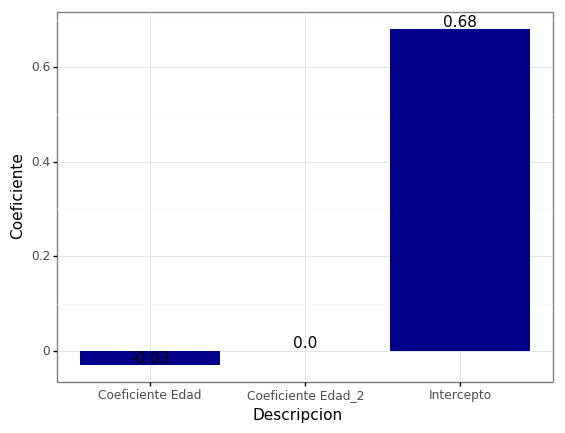

<ggplot: (7555178493)>

In [18]:
coefs={'Descripcion':['Coeficiente Edad', 'Coeficiente Edad_2', 'Intercepto'],'Coeficiente':[regr.coef_[0][0], regr.coef_[0][1], regr.intercept_[0]]}
coefs=pd.DataFrame(coefs)

orden_coef=(
 coefs >>
    arrange(X.Coeficiente) >>
    select('Descripcion') >>
    pull
)

(
 coefs >>
    arrange(X.Coeficiente) >>
    mutate(Coeficiente = X.Coeficiente.round(2)) >>
    ggplot() +
    geom_bar(aes(x='Descripcion',y='Coeficiente'),stat='identity',fill='darkblue') +
    scale_x_discrete(limits = orden_coef) +
    geom_text(aes(x='Descripcion', y='Coeficiente', label='Coeficiente'), va='bottom') +
    theme_bw()
)

Se calcula el error cuadrático medio

In [19]:
mean_squared_error(data_age_y, age_y_pred)

0.10080627360132319

Se imprime la R2

In [20]:
r2_score(data_age_y, age_y_pred)

0.02413457814644593

Se crea grid para ver el efecto marginal

In [21]:
grid=pd.DataFrame({'age':range(100)})
grid=(
 grid >>
    mutate(age2=X.age*X.age)
)

(
 grid >>
    head()
)

age  age2
0    0     0
1    1     1
2    2     4
3    3     9
4    4    16

Se hacer predict al grid y se agrega al DataFrame con el _grid_ y se grafica

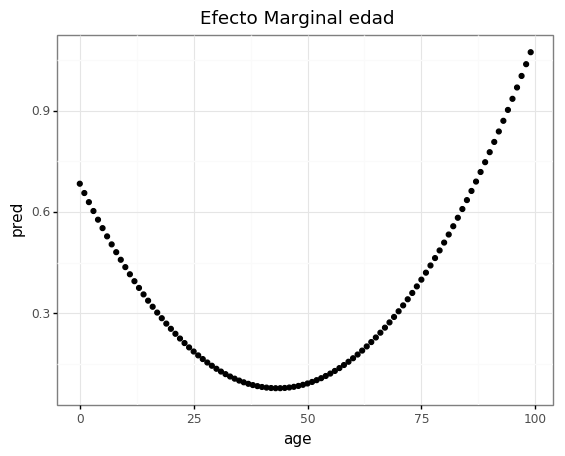

<ggplot: (-9223372029297439600)>

In [22]:
grid_pred=regr.predict(grid)
(
 grid >>
    mutate(pred=grid_pred) >>
    ggplot() +
    geom_point(aes(x='age', y='pred')) +
    ggtitle('Efecto Marginal edad') +
    theme_bw()
)

## Modelo H2O

Se instala H2O desde anaconda siguiendo las instrucciones del link:

https://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/downloading.html

También debe de instalarse JDK de Java para poder iniciar H2O

### Se inicia H2O

In [23]:
import h2o
h2o.init(max_mem_size = "12G", nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/darias/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/dz/y365nyjn6kqgc1k6dc68xkg00000gp/T/tmp3dy2mit6
  JVM stdout: /var/folders/dz/y365nyjn6kqgc1k6dc68xkg00000gp/T/tmp3dy2mit6/h2o_darias_started_from_python.out
  JVM stderr: /var/folders/dz/y365nyjn6kqgc1k6dc68xkg00000gp/T/tmp3dy2mit6/h2o_darias_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       America/Mexico_City
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.2
H2O cluster version age:    25 days
H2O cluster name:           H2O_from_python_darias_3oz75f
H2O cluster total nodes:    1
H2O cluster free memory:    12 Gb
H2O cluster total cores:    12
H2O cluster allowed cores:  12
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.0 final
--------------------------  ----------------------------------------

### Cambio de string a categorías

Se convierte a H2O el _Data frame_, convirtiendo en categoría primero las columnas necesarias

In [24]:
data=(
 data >>
    mutate(job       = X.job.astype('category'),
           marital   = X.marital.astype('category'),
           education = X.education.astype('category'),
           default   = X.default.astype('category'),
           housing   = X.housing.astype('category'),
           loan      = X.loan.astype('category'),
           contact   = X.contact.astype('category'),
           month     = X.month.astype('category'),
           poutcome  = X.poutcome.astype('category'),
           y         = X.y.astype('category'))    
)

### Datos a H2O

In [25]:
datos_h2o=h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Categorías a factores

In [26]:
datos_h2o['job']=datos_h2o['job'].asfactor()
datos_h2o['marital']=datos_h2o['marital'].asfactor()
datos_h2o['education']=datos_h2o['education'].asfactor()
datos_h2o['default']=datos_h2o['default'].asfactor()
datos_h2o['housing']=datos_h2o['housing'].asfactor()
datos_h2o['loan']=datos_h2o['loan'].asfactor()
datos_h2o['contact']=datos_h2o['contact'].asfactor()
datos_h2o['month']=datos_h2o['month'].asfactor()
datos_h2o['poutcome']=datos_h2o['poutcome'].asfactor()
datos_h2o['y']=datos_h2o['y'].asfactor()

### Split de datos

Se hace el _split_ en:
  - train
  - test
  - validation

In [27]:
train, valid, test = datos_h2o.split_frame(ratios=[0.6,0.2], seed=1234)

### Se definen X y Y

Se separan las variables X y Y

In [28]:
varsX=datos_h2o.col_names[:-1]
varsX=varsX[:-5]
varsY=datos_h2o.col_names[-1]

In [29]:
varsX

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month']

In [30]:
varsY

'y'

### Entrenamiento - grid

Entrenamiento

In [31]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

Se crea el grid de hiperparámetros

In [33]:
hyper_parameters = {'learn_rate': [0.008, 0.01, 0.02],
                    'max_depth': [6,7,8,9],
                    'sample_rate': [0,6,0,7,0.8,0.9],
                    'col_sample_rate': [0.5, 0.6, 0,7, 1]}

search_criteria = { 'strategy': "RandomDiscrete",
                    'seed': 42,
                    'stopping_metric': "AUC", 
                    'stopping_tolerance': 0.001,
                    'stopping_rounds': 5 }

In [34]:
grid_gbm=H2OGridSearch(H2OGradientBoostingEstimator(),
                       hyper_parameters,
                       grid_id="random_plus_manual",
                       search_criteria=search_criteria)

In [35]:
grid_gbm.train(x=varsX,
               y=varsY,
               training_frame=train,
               validation_frame=test,
               ntrees=200,
               seed=1,
               nfolds=4,
               balance_classes=True)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_1.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_1.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_6.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_6.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sa


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_11.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_11.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: 


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_16.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be bet


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_21.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_21.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: 

failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_24.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_p


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_30.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_30.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate:

failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_33.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_33.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_38.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_38.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: 


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_42.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_42.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate:


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_47.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_47.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: 


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_52.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be bet


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_57.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_57.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate:


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_63.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_63.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate:


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_68.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_68.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate:


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 0.9
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_72.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_72.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate:


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_77.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_77.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: 


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_83.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be bet


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 0.8
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_87.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_87.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: 


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_91.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_91.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate:


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_95.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_95.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate:


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_99.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_99.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate:


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_104.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_104.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rat


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_109.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_109.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_113.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_113.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rat


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_117.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_124.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_131.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_136.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_136.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_143.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.8
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_147.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_147.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_152.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_152.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 0.9
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_156.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_156.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_165.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_173.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_173.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_178.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_183.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_183.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rat


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_187.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 0.8
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_193.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_193.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rat


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_197.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_201.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_201.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_209.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_209.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.8
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_213.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_213.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate


Hyper-parameter: col_sample_rate, 0.6
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_219.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_219.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_225.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_225.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _sample_rat


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_229.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_229.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_234.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_243.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_252.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.9
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_256.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_256.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_260.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_260.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_269.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_275.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 0.5
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_283.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_283.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 9
Hyper-parameter: sample_rate, 0.9
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_288.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_288.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rat


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 0.9
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_294.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_294.  Details: ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _col_sample_rat


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.02
Hyper-parameter: max_depth, 6
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_298.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_306.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 7.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_317.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.008
Hyper-parameter: max_depth, 7
Hyper-parameter: sample_rate, 7.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_324.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 7.0.
ERRR on field: _col_sample_rate: col_sample_rate must be b


Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 0.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_329.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: random_plus_manual_model_329.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 0.0.
ERRR on field: _sample_rate


Hyper-parameter: col_sample_rate, 0.0
Hyper-parameter: learn_rate, 0.01
Hyper-parameter: max_depth, 8
Hyper-parameter: sample_rate, 6.0
failure_details: Illegal argument(s) for GBM model: random_plus_manual_model_333.  Details: ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be between 0 and 1
ERRR on field: _sample_rate: sample_rate should be in interval ]0,1] but it is 6.0.
ERRR on field: _col_sample_rate: col_sample_rate must be be

Se ven los resultados del grid

### Resultados Grid

In [36]:
grid_gbm_list=grid_gbm.get_grid(sort_by='logloss', decreasing=False)
grid_gbm_list

      col_sample_rate learn_rate max_depth sample_rate  \
0                 0.6       0.02         6         0.8   
1                 0.5       0.02         6         0.8   
2                 0.6       0.02         6         0.9   
3                 0.5       0.02         6         0.9   
4                 1.0       0.02         6         0.9   
5                 0.5       0.02         7         0.8   
6                 0.5       0.02         7         0.9   
7                 0.6       0.02         7         0.8   
8                 0.6       0.02         7         0.9   
9                 1.0       0.02         7         0.8   
10                1.0       0.02         7         0.9   
11                0.5       0.02         8         0.8   
12                0.6       0.01         7         0.8   
13                0.6       0.02         8         0.8   
14                0.6       0.01         8         0.8   
15                0.5       0.02         8         0.9   
16            

### Mejor Modelo

Se extrae el mejor modelo

In [37]:
best_gbm = grid_gbm_list.models[0]

Se guarda el mejor modelo

In [38]:
h2o.save_model(model=best_gbm,
               path="/Users/darias/Documents/Aprendiendo_python/modelo_pyhton/Modelo_gbm",
               force=True)

'/Users/darias/Documents/Aprendiendo_python/modelo_pyhton/Modelo_gbm/random_plus_manual_model_78'

Se carga el modelo _(si es que se requiere, cuando se reinicia el kernel)_

In [39]:
#best_gbm = h2o.load_model('/Users/darias/Documents/Aprendiendo_python/modelo_pyhton/Modelo_gbm/random_plus_manual_model_65')

### Importancia de variables

Importancia de variables

In [40]:
imp=best_gbm.varimp()
imp=pd.DataFrame(imp)
imp

0             1         2         3
0       month  31547.699219  1.000000  0.354093
1     contact  13221.429688  0.419093  0.148398
2         day  11133.833008  0.352921  0.124967
3         job   8246.935547  0.261412  0.092564
4     housing   7184.817383  0.227745  0.080643
5         age   7170.170898  0.227280  0.080478
6     balance   4937.459961  0.156508  0.055418
7     marital   2015.820801  0.063898  0.022626
8   education   1802.825806  0.057146  0.020235
9        loan   1568.062256  0.049704  0.017600
10    default    265.267700  0.008408  0.002977

In [41]:
imp=(
 imp >>
    rename(variable            = 0,
           relative_importance = 1,
           scaled_importance   = 2,
           percentage          = 3)
)

imp

variable  relative_importance  scaled_importance  percentage
0       month         31547.699219           1.000000    0.354093
1     contact         13221.429688           0.419093    0.148398
2         day         11133.833008           0.352921    0.124967
3         job          8246.935547           0.261412    0.092564
4     housing          7184.817383           0.227745    0.080643
5         age          7170.170898           0.227280    0.080478
6     balance          4937.459961           0.156508    0.055418
7     marital          2015.820801           0.063898    0.022626
8   education          1802.825806           0.057146    0.020235
9        loan          1568.062256           0.049704    0.017600
10    default           265.267700           0.008408    0.002977

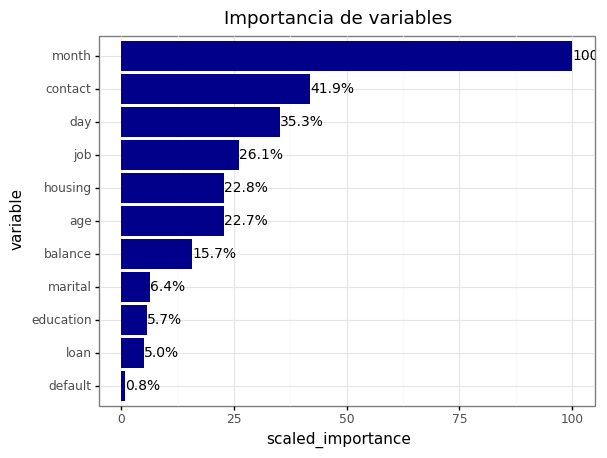

<ggplot: (7577939881)>

In [42]:
(
 imp >>
    mutate(scaled_importance = X.scaled_importance*100) >>
    mutate(scaled_importance = X.scaled_importance.round(1)) >>
    ggplot() +
    geom_bar(aes(x='variable', y='scaled_importance'), stat='identity', fill='darkblue') +
    ggtitle('Importancia de variables') +
    scale_x_discrete(limits = imp >> arrange(X.relative_importance) >> select(X.variable) >> pull) +
    theme(axis_text_x=element_text(angle=90, face='bold', size=10),
          axis_text_y=element_text(face='bold', size=10)) +
    theme_bw() +
    coord_flip() +
    geom_text(aes(x='variable',y='scaled_importance',label='scaled_importance'), ha='left', format_string='{}%', size = 10)
)

### Efectos Marginales del Top 3

Se obtienen las gráficas del Top 3 de importancia de variables

In [43]:
df_pp_1=best_gbm.partial_plot(cols=['month'],data=valid,plot=False)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


In [44]:
df_pp_1=df_pp_1[0].as_data_frame()
(
 df_pp_1 >>
    head()
)

month  mean_response  stddev_response  std_error_mean_response
0   apr       0.205472         0.124489                 0.001308
1   aug       0.100516         0.060610                 0.000637
2   dec       0.296465         0.147755                 0.001553
3   feb       0.182249         0.127500                 0.001340
4   jan       0.134148         0.098548                 0.001036

In [45]:
df_pp_1=(
 df_pp_1 >>
    arrange(X.mean_response)
)

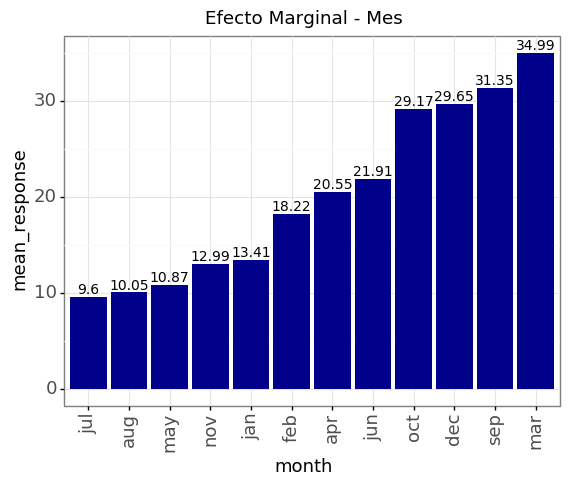

<ggplot: (-9223372029276811246)>

In [46]:
(
 df_pp_1 >>
    mutate(mean_response=(X.mean_response*100).round(2)) >>
    ggplot() +
    geom_bar(aes(x = 'month', y = 'mean_response'),stat='identity', fill = 'darkblue') +
    theme_bw() +
    ggtitle('Efecto Marginal - Mes') +
    theme(axis_text_x=element_text(angle=90,size=13),
          axis_text_y=element_text(size=13),
          axis_title_x=element_text(size=13),
          axis_title_y=element_text(size=13)) +
    scale_x_discrete(limits=df_pp_1>>select(X.month)>>pull) +
    geom_text(aes(x='month', y='mean_response',label='mean_response'), va='bottom',size=10)
)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


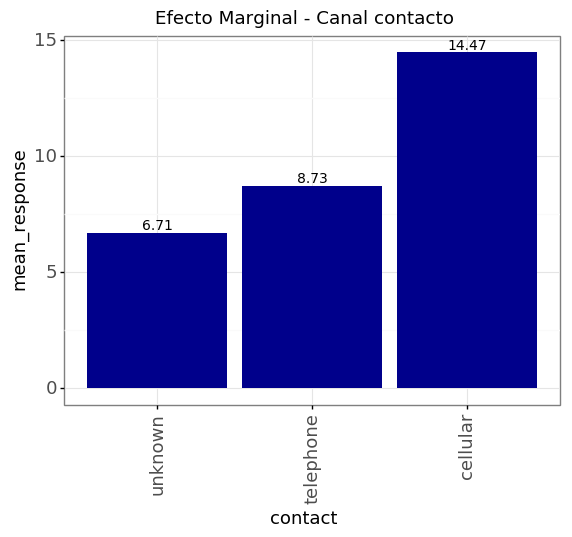

<ggplot: (7578158554)>

In [47]:
df_pp_2=best_gbm.partial_plot(cols=['contact'],data=valid,plot=False)
df_pp_2=df_pp_2[0].as_data_frame()

df_pp_2=(
 df_pp_2 >>
    arrange(X.mean_response)
)

(
 df_pp_2 >>
    mutate(mean_response=(X.mean_response*100).round(2)) >>
    ggplot() +
    geom_bar(aes(x = 'contact', y = 'mean_response'),stat='identity', fill = 'darkblue') +
    theme_bw() +
    ggtitle('Efecto Marginal - Canal contacto') +
    theme(axis_text_x=element_text(angle=90,size=13),
          axis_text_y=element_text(size=13),
          axis_title_x=element_text(size=13),
          axis_title_y=element_text(size=13)) +
    scale_x_discrete(limits=df_pp_2>>select(X.contact)>>pull) +
    geom_text(aes(x='contact', y='mean_response',label='mean_response'), va='bottom',size=10)
)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


/Users/darias/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


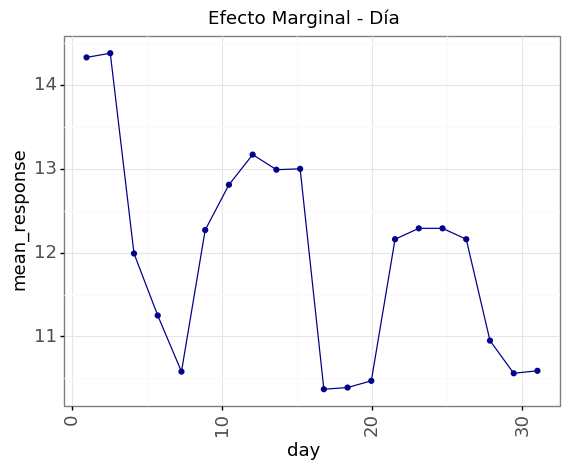

<ggplot: (-9223372029276818379)>

In [48]:
df_pp_3=best_gbm.partial_plot(cols=['day'],data=valid,plot=False)
df_pp_3=df_pp_3[0].as_data_frame()

df_pp_3=(
 df_pp_3 >>
    arrange(X.mean_response)
)

(
 df_pp_3 >>
    mutate(mean_response=(X.mean_response*100).round(2)) >>
    ggplot() +
    geom_point(aes(x = 'day', y = 'mean_response'), colour = 'darkblue') +
    geom_line(aes(x = 'day', y = 'mean_response', group = 1), colour = 'darkblue') +
    theme_bw() +
    ggtitle('Efecto Marginal - Día') +
    theme(axis_text_x=element_text(angle=90,size=13),
          axis_text_y=element_text(size=13),
          axis_title_x=element_text(size=13),
          axis_title_y=element_text(size=13))
)

### Performance

In [49]:
perf_train=best_gbm.model_performance(train)
perf_test=best_gbm.model_performance(test)
perf_valid=best_gbm.model_performance(valid)

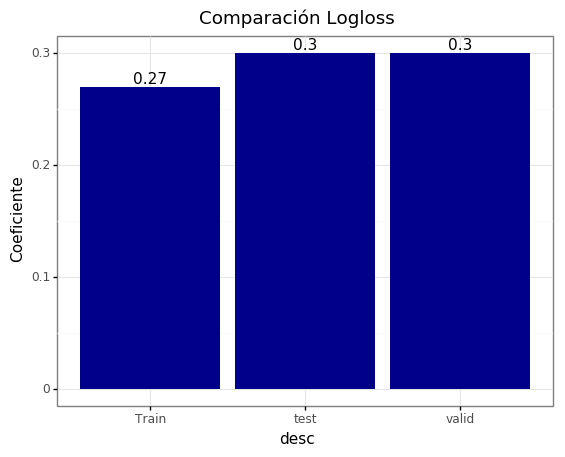

<ggplot: (7578254870)>

In [50]:
ll={'desc':['Train', 'test', 'valid'],'Coeficiente':[perf_train.logloss(),
                                                     perf_test.logloss(),
                                                     perf_valid.logloss()]}
ll=pd.DataFrame(ll)

orden_ll=(
 ll >>
    select('desc') >>
    pull
)

(
 ll >>
    mutate(Coeficiente = X.Coeficiente.round(2)) >>
    ggplot() +
    geom_bar(aes(x='desc',y='Coeficiente'),stat='identity',fill='darkblue') +
    scale_x_discrete(limits = orden_ll) +
    geom_text(aes(x='desc', y='Coeficiente', label='Coeficiente'), va='bottom') +
    theme_bw() +
    ggtitle('Comparación Logloss')
)

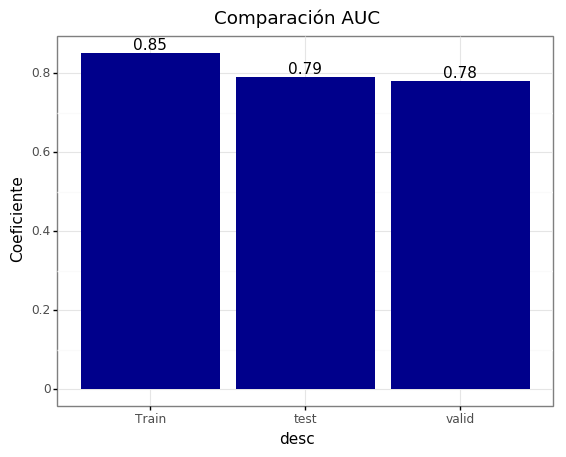

<ggplot: (-9223372029276833115)>

In [51]:
df_auc={'desc':['Train', 'test', 'valid'],'Coeficiente':[perf_train.auc(),
                                                         perf_test.auc(),
                                                         perf_valid.auc()]}
df_auc=pd.DataFrame(df_auc)

orden_df_auc=(
 ll >>
    select('desc') >>
    pull
)

(
 df_auc >>
    mutate(Coeficiente = X.Coeficiente.round(2)) >>
    ggplot() +
    geom_bar(aes(x='desc',y='Coeficiente'),stat='identity',fill='darkblue') +
    scale_x_discrete(limits = orden_df_auc) +
    geom_text(aes(x='desc', y='Coeficiente', label='Coeficiente'), va='bottom') +
    theme_bw() +
    ggtitle('Comparación AUC')
)

### Efectividades

Se obtiene el _score_ de _valid_

In [52]:
est_valid=best_gbm.predict(valid)
est_valid=est_valid.as_data_frame()
est_valid=est_valid['p1']

gbm prediction progress: |████████████████████████████████████████████████| 100%


Se obtiene el _observado_ de _valid_

In [53]:
obs_valid=valid['y']
obs_valid=obs_valid.as_data_frame()

Se juntan estimado y observado en un mismo data frame

In [54]:
obs_est=(
 obs_valid >>
    mutate(est = est_valid) >>
    rename(obs='y')
)

(
 obs_est >>
    head()
)

obs       est
0    0  0.032250
1    0  0.023729
2    0  0.018935
3    0  0.022207
4    0  0.026102

Se agregan los percentiles

In [55]:
obs_est['per']=pd.qcut(obs_est.est, q=[0.01,0.1,0.2,0.3,0.4,0.5,
                                       0.6,0.7,0.8,0.9,1.0], 
                                   labels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

Se obtienen las efectividades por percentiles

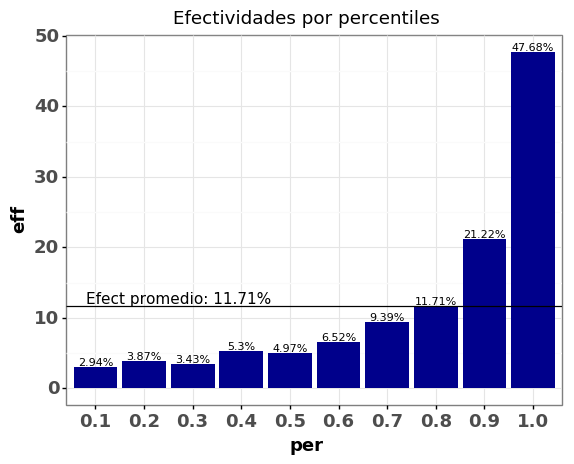

<ggplot: (7577942592)>

In [56]:
pct_1=(
 obs_est >>
    mutate(obs = X.obs.astype('int')) >>
    summarize(pct = X.obs.sum()/len(obs_est)) >>
    pull
)

(
 obs_est >>
    mutate(obs = X.obs.astype('int')) >>
    group_by(X.per) >>
    summarize(n = n(X.obs),
              vp = X.obs.sum()) >>
    mutate(eff = X.vp/X.n*100) >>
    mutate(eff = X.eff.round(2)) >>
    ggplot() +
    geom_bar(aes(x = 'per', y = 'eff'), stat = 'identity', fill = 'darkblue') +
    theme_bw() +
    ggtitle('Efectividades por percentiles') +
    theme(axis_text_x  = element_text(size = 13, face = 'bold'),
          axis_text_y  = element_text(size = 13, face = 'bold'),
          axis_title_x = element_text(size = 13, face = 'bold'),
          axis_title_y = element_text(size = 13, face = 'bold')) +
    geom_text(aes(x='per',y='eff',label='eff'),va='bottom',size=8,format_string='{}%') +
    geom_hline(yintercept=pct_1*100) +
    annotate(geom  = 'text',
             x     = 0.8,
             y     = pct_1*100,
             label = 'Efect promedio: '+(100*pct_1).round(2).astype('str')+'%',
             ha    = 'left',
             va    = 'bottom')
)

In [58]:
h2o.shutdown()

[WARNING] in <ipython-input-58-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_a3fe closed.
